## Finite Difference Method (Harmonic Oscillator)

N = 1000
E = [ 0.50049897  1.50150548  2.50267001  3.50508717  4.51377361  5.54379128
  6.62485415  7.79572963  9.09048367 10.52992541]


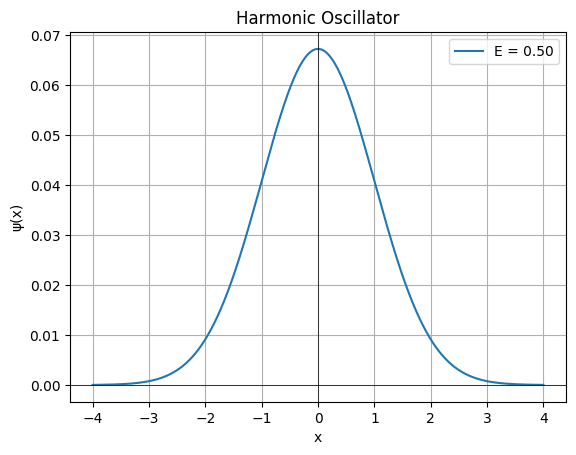

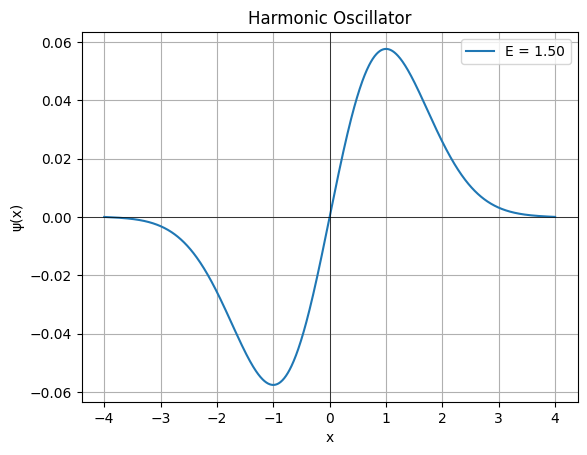

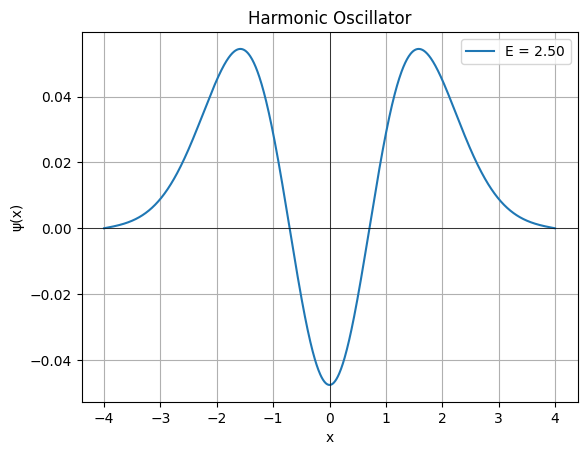

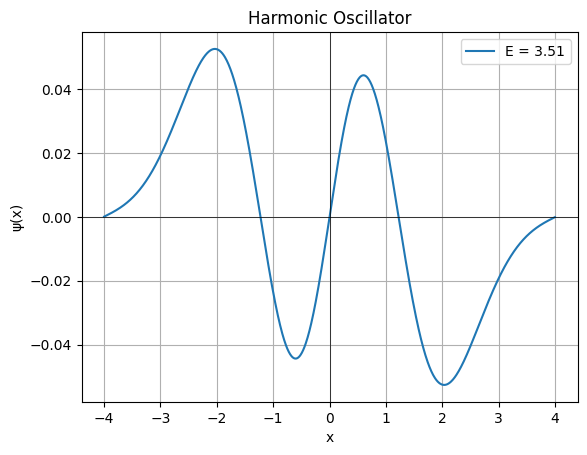

In [1]:
import numpy as np
import matplotlib.pyplot as plt

h = 0.008
hbar = 1
m = 1
w = 1
x0 = -4
xl = 4
N = int((xl - x0) / h)
print(f'N = {N}')
x = np.linspace(x0, xl, N)
c = -hbar**2 / (2 * m * h**2)

def V(x):
    return 0.5 * m * w**2 * x**2

H = c*(np.diag(np.ones(N-1), k = -1)+ np.diag(-2*np.ones(N), k = 0) + np.diag(np.ones(N-1), k = 1)) + np.diag(V(x))

E, psi = np.linalg.eigh(H)
print(f'E = {E[:10]}')

# plt.plot(x, V(x), label = 'V(x)',linestyle='--')
for i in range(4):
    plt.plot(x,psi[:, i], label = 'E = %.2f' % E[i])
    plt.legend()
    plt.axhline(0, color='black', lw=0.5)
    plt.axvline(0, color='black', lw=0.5)
    plt.title('Harmonic Oscillator')
    plt.ylabel('ψ(x)')
    plt.xlabel('x')
    plt.grid()
    plt.show()


# Anharmonic Oscillator

E = [ 0.49034321  1.43096694  2.30597345  3.17381349  4.14022868  5.23441405
  6.43962612  7.74108883  9.13420757 10.6266732 ]


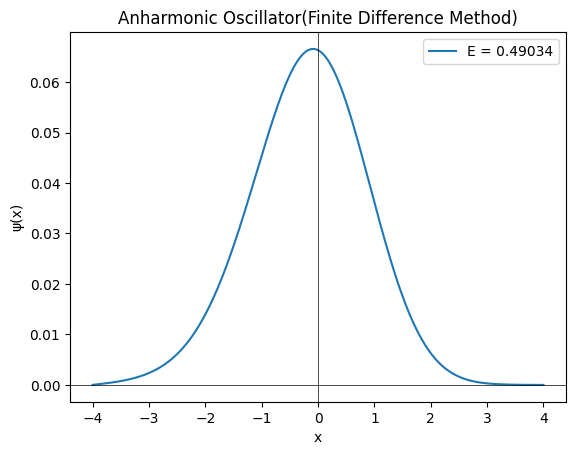

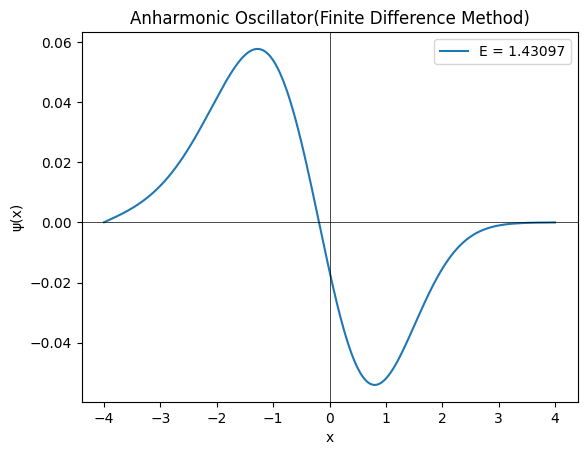

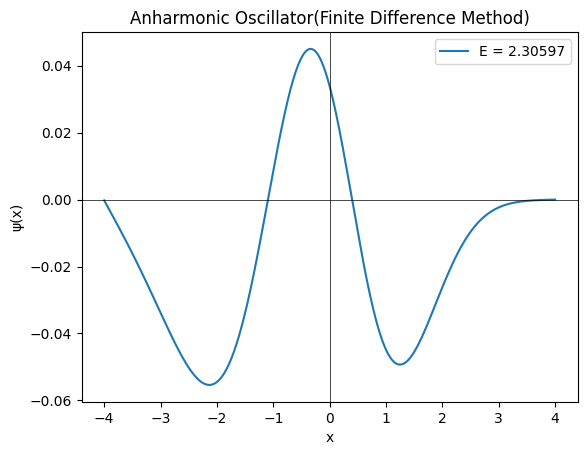

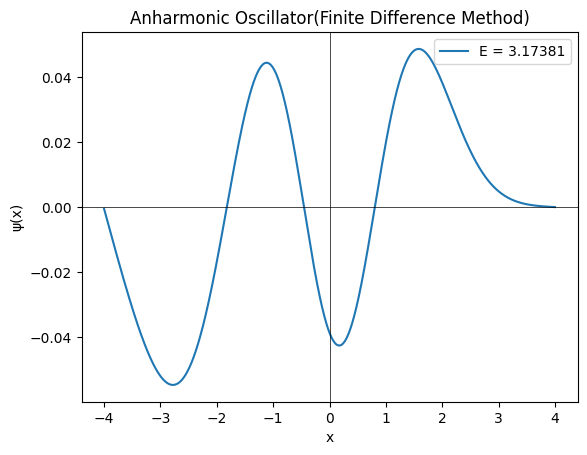

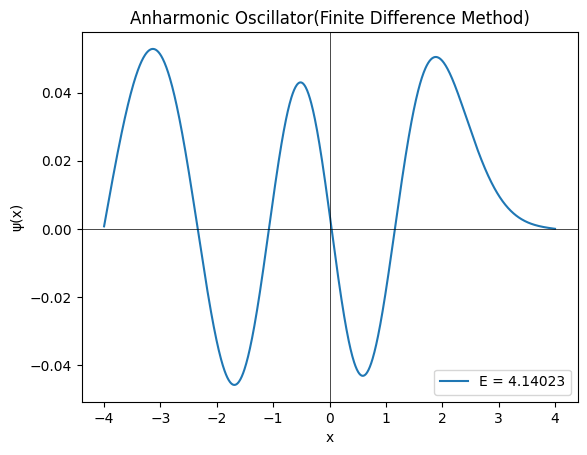

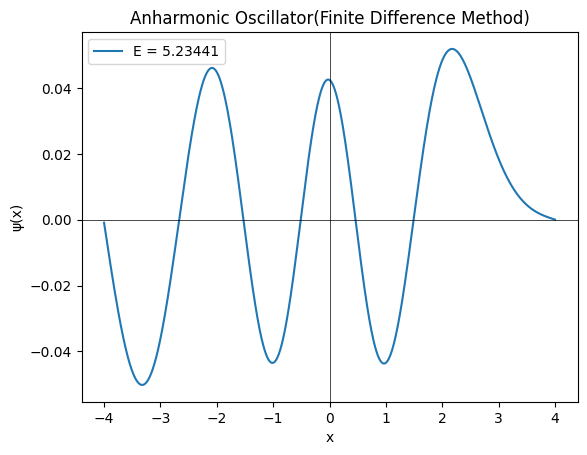

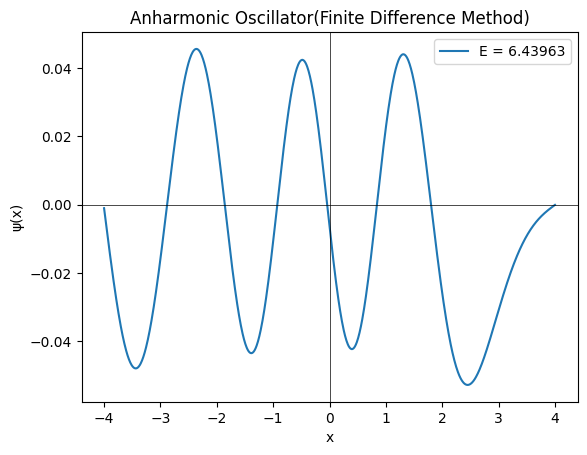

In [2]:
import numpy as np
import matplotlib.pyplot as plt

h = 0.008
hbar = 1
m = 1
w = 1
x0 = -4
xl = 4
b = 0.33*0.25
N = int((xl - x0) / h)
x = np.linspace(x0, xl, N)
c = -hbar**2 / (2 * m * h**2)

def V(x):
    return 0.5 * m * w**2 * x**2 + b * x**3

H = c*(np.diag(np.ones(N-1), k = -1)+ np.diag(-2*np.ones(N), k = 0) + np.diag(np.ones(N-1), k = 1)) + np.diag(V(x))

E, psi = np.linalg.eigh(H)
print(f'E = {E[:10]}')

# plt.plot(x, V(x), label = 'V(x)',linestyle='--')
for i in range(7):
    plt.plot(x,-psi[:, i], label = 'E = %.5f' % E[i])
    plt.legend()
    plt.axhline(0, color='black', lw=0.5)
    plt.axvline(0, color='black', lw=0.5)
    plt.title('Anharmonic Oscillator(Finite Difference Method)')
    plt.ylabel('ψ(x)')
    plt.xlabel('x')
    plt.show()


## Harmonic Analytical


N = 1000
E = [ 0.50049897  1.50150548  2.50267001  3.50508717  4.51377361  5.54379128
  6.62485415  7.79572963  9.09048367 10.52992541]


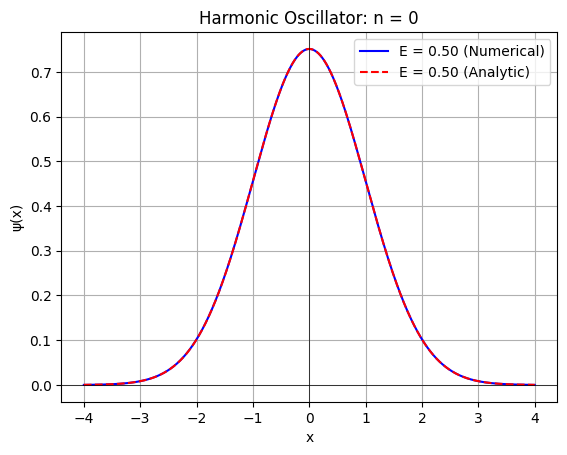

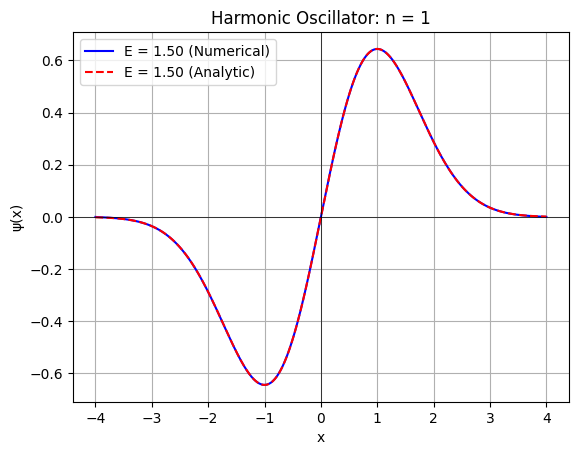

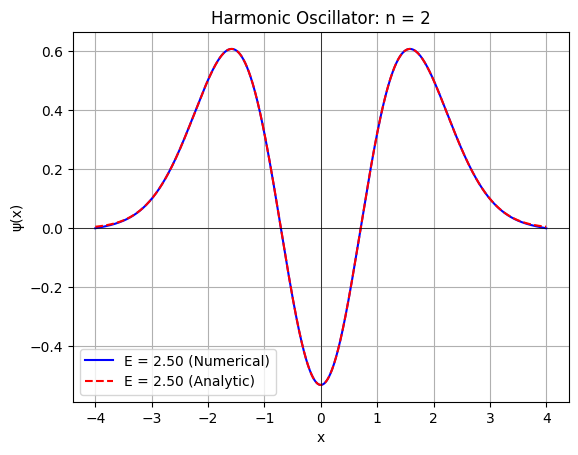

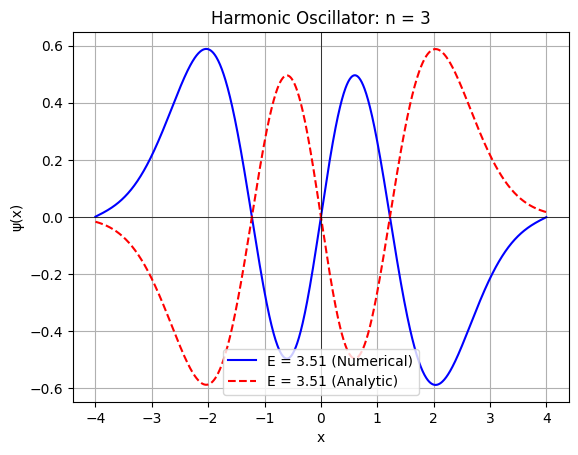

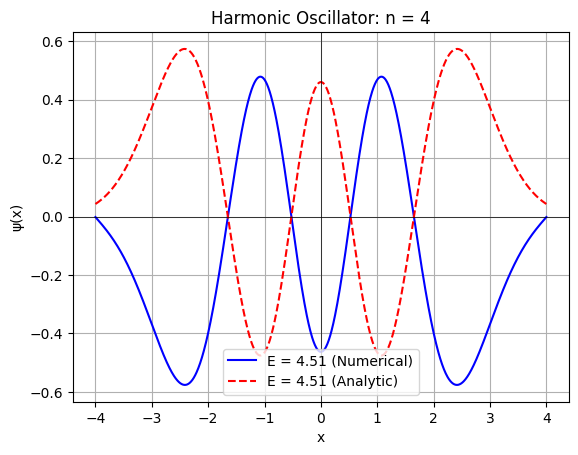

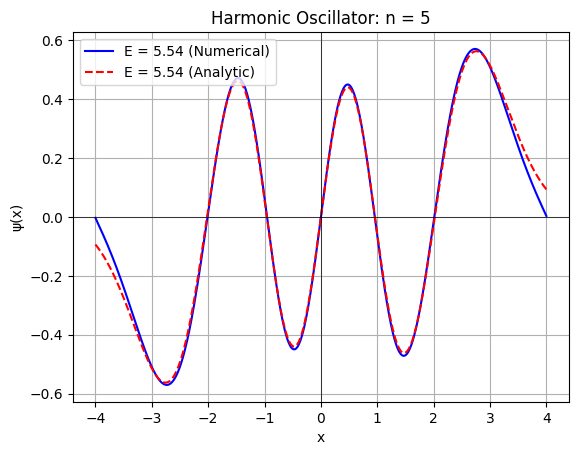

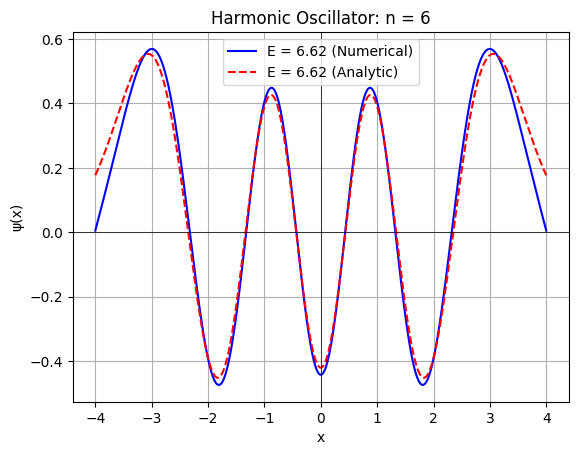

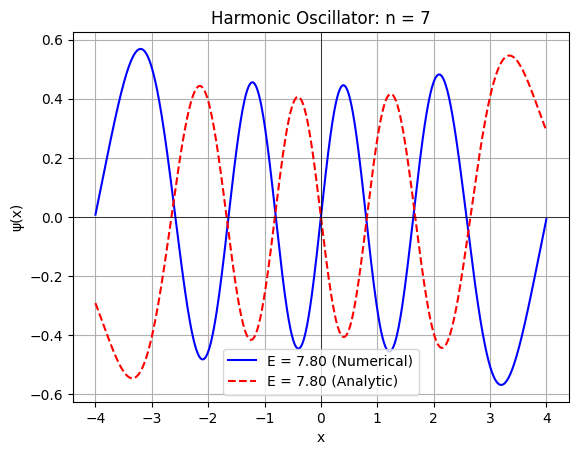

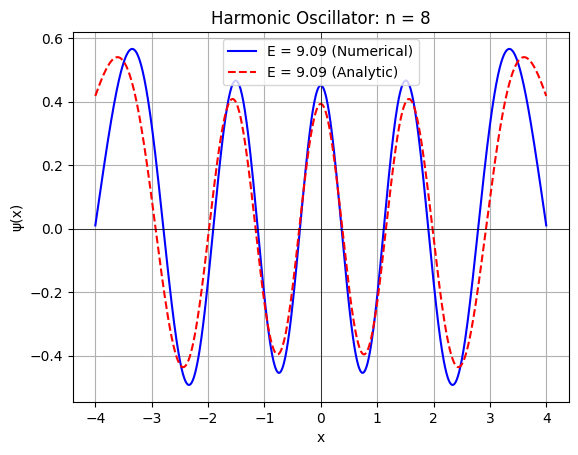

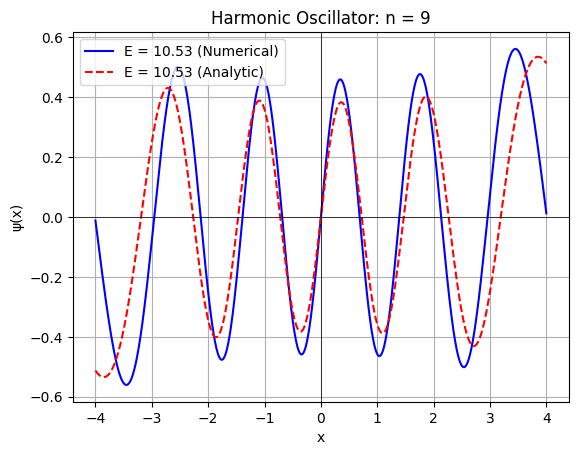

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

h = 0.008
hbar = 1
m = 1
w = 1
x0 = -4
xl = 4
N = int((xl - x0) / h)
print(f'N = {N}')
x = np.linspace(x0, xl, N)
c = -hbar**2 / (2 * m * h**2)

def V(x):
    return 0.5 * m * w**2 * x**2

H = c * (np.diag(np.ones(N-1), k=-1) + np.diag(-2 * np.ones(N), k=0) + np.diag(np.ones(N-1), k=1)) + np.diag(V(x))
E, psi = np.linalg.eigh(H)
print(f'E = {E[:10]}')

# Analytical solution
def psi_analytic(x, n):
    return (m * w / np.pi / hbar)**0.25 * np.exp(-m * w * x**2 / 2 / hbar) * np.polynomial.hermite.hermval(np.sqrt(m * w / hbar) * x, [0]*n + [1])*1/np.sqrt(2**n*math.factorial(n))

# Normalize numerical psi
def normalize(psi):
    return psi / np.sqrt(np.trapz(psi**2, x))

# Plot the first 4 eigenfunctions
for i in range(10):
    plt.plot(x, normalize(psi[:, i]), label=f'E = {E[i]:.2f} (Numerical)', color='blue')
    plt.plot(x, psi_analytic(x, i), label=f'E = {E[i]:.2f} (Analytic)', linestyle='--', color='red')
    
    plt.axhline(0, color='black', lw=0.5)
    plt.axvline(0, color='black', lw=0.5)
    plt.title(f'Harmonic Oscillator: n = {i}')
    plt.ylabel('ψ(x)')
    plt.xlabel('x')
    plt.legend()
    plt.grid()
    plt.show()


## Morse Potential

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh
import ipywidgets as widgets

# m_H = 940e6  # mass of hydrogen atom in eV/c^2
# a = 1.94  # in Angstrom^-1
# re = 0.74  # in Angstrom
# De = 4.75  # in eV
# hbar = 1973.269804  # in eV*Angstrom/c (hbar c = 1973.2 eV·Å)


def plot(hbar, m_H, De, re, a):
        
    mu = m_H / 2

    def V(R):
        return De * (np.exp(-2 * a * R) - 2 * np.exp(-a * R))

    R_min = -2.0  # in Angstrom (R = r - re)
    R_max = 2.0   # in Angstrom
    N = 1000  # number of grid points
    R = np.linspace(R_min, R_max, N)
    step_size = R[1] - R[0]  # spatial step size
    c = -hbar**2 / (2 * mu * step_size**2)

    H = np.zeros((N, N))

    H = c * (np.diag(np.ones(N-1), k=-1) + np.diag(-2 * np.ones(N), k=0) + np.diag(np.ones(N-1), k=1)) + np.diag(V(R))

    eigenvalues, eigenvectors = eigh(H)
    print(eigenvalues[:5])

    def normalize(wavefunction):
        return wavefunction / np.sqrt(np.sum(wavefunction**2) * step_size)

    for i in range(2):
        plt.plot(R + re, normalize(eigenvectors[:, i]), label=f'E = {eigenvalues[i]:.2f} eV')
        plt.plot(R + re, V(R), label='V(R)', linestyle='--')
        plt.xlabel('r (Angstrom)')
        plt.ylabel('Energy (eV)')
        plt.legend()
        plt.axhline(0, color='black', lw=0.5)
        plt.axvline(0, color='black', lw=0.5)
        plt.axvline(re, color='red', lw=0.5, linestyle='--')
        plt.title(f'Morse Potential (n = {i})')
        plt.ylim(-5, 7)
        plt.xlim(-0.5, 2.5)
        plt.grid()



widgets.interact(plot, hbar=widgets.FloatSlider(value=1973.269804, min=1000, max=3000, step=100, description='hbar (eV*Angstrom/c)'),
                 m_H=widgets.FloatSlider(value=940e6, min=930e6, max=950e6, step=100, description='m (eV/c^2)'),
                 De=widgets.FloatSlider(value=4.75, min=1, max=10, step=0.5, description='De (eV)'),
                 re=widgets.FloatSlider(value=0.74, min=0.5, max=1.0, step=0.1, description='re (Angstrom)'),
                 a=widgets.FloatSlider(value=1.94, min=1, max=3, step=0.1, description='a (Angstrom^-1)'))



interactive(children=(FloatSlider(value=1973.269804, description='hbar (eV*Angstrom/c)', max=3000.0, min=1000.…

<function __main__.plot(hbar, m_H, De, re, a)>

E = [-4.4817881  -3.9687754  -3.48698602 -3.03640322 -2.61701212 -2.22879972
 -1.87175489 -1.54586841 -1.2511329  -0.98754288 -0.75509463 -0.55377219
 -0.3829141  -0.23387551 -0.08012385]


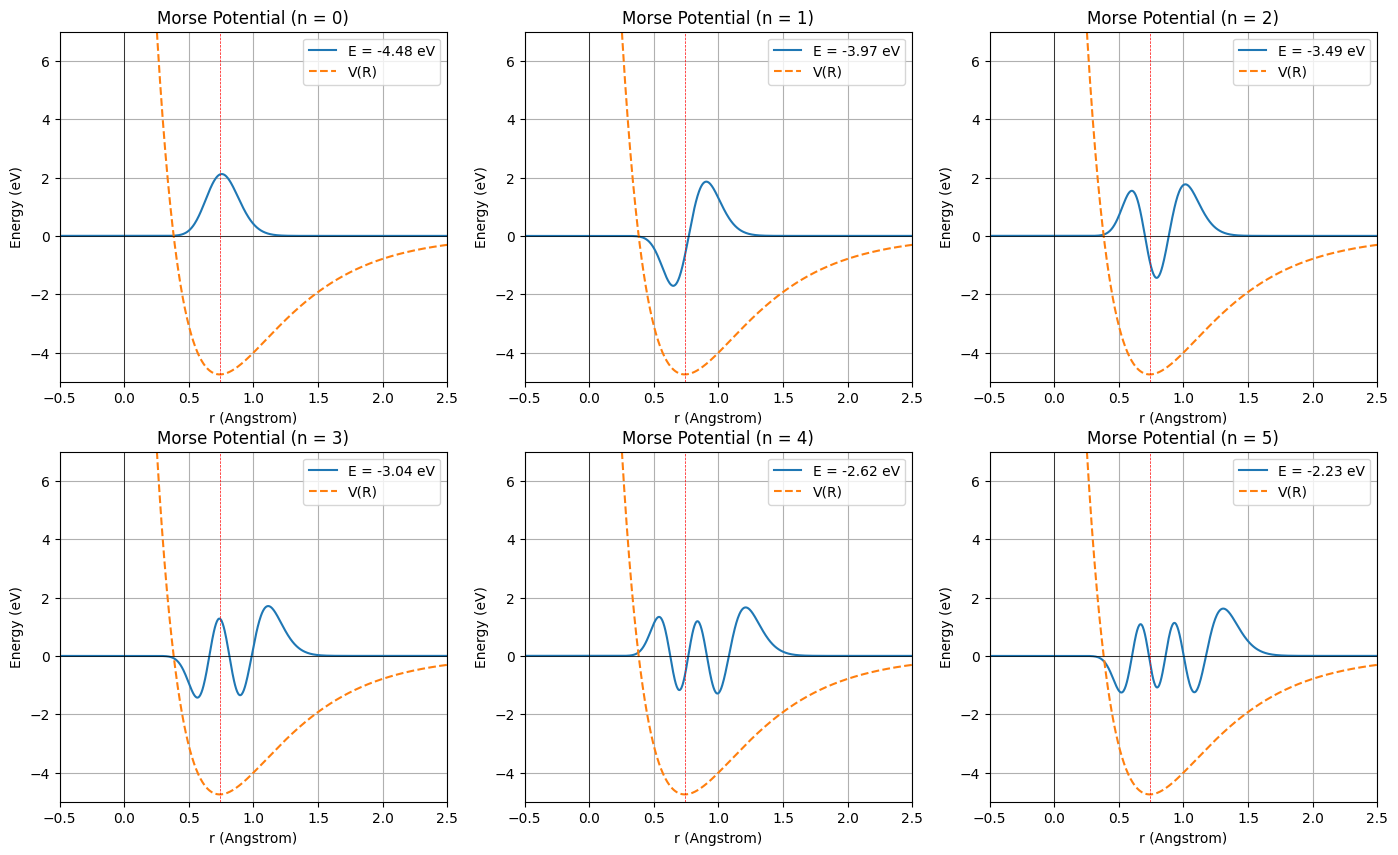

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

# Constants
m_H = 940e6  # mass of hydrogen atom in eV/c^2
a = 1.94  # in Angstrom^-1
re = 0.74  # in Angstrom
De = 4.75  # in eV
hbar = 1973.269804  # in eV*Angstrom/c (hbar c = 197.3 eV·Å)

mu = m_H / 2

def V(R):
    return De * (np.exp(-2 * a * R) - 2 * np.exp(-a * R))

R_min = -2.0  # in Angstrom (R = r - re)
R_max = 2.0   # in Angstrom
N = 1000  # number of grid points
R = np.linspace(R_min, R_max, N)
step_size = R[1] - R[0]  # spatial step size
c = -hbar**2 / (2 * mu * step_size**2)

H = np.zeros((N, N))

H = c * (np.diag(np.ones(N-1), k=-1) + np.diag(-2 * np.ones(N), k=0) + np.diag(np.ones(N-1), k=1)) + np.diag(V(R))

eigenvalues, eigenvectors = eigh(H)
print(f'E = {eigenvalues[:15]}')

def normalize(wavefunction):
    return wavefunction / np.sqrt(np.sum(wavefunction**2) * step_size)

fig, ax = plt.subplots(2,3, figsize=(17, 10))
ax = ax.flatten()
for i in range(6):
    ax[i].plot(R + re, normalize(eigenvectors[:, i]), label=f'E = {eigenvalues[i]:.2f} eV')
    ax[i].plot(R + re, V(R), label='V(R)', linestyle='--')
    ax[i].set_xlabel('r (Angstrom)')
    ax[i].set_ylabel('Energy (eV)')
    ax[i].legend()
    ax[i].axhline(0, color='black', lw=0.5)
    ax[i].axvline(0, color='black', lw=0.5)
    ax[i].axvline(re, color='red', lw=0.5, linestyle='--')
    ax[i].set_title(f'Morse Potential (n = {i})')
    ax[i].set_ylim(-5, 7)
    ax[i].set_xlim(-0.5, 2.5)
    ax[i].grid()



## Harmonic AND Morse Potential

N = 1000
E = [-4.65124246 -4.45373679 -4.25624997 -4.05878199 -3.86133286 -3.66390257
 -3.46649114 -3.26909857 -3.07172485 -2.87437   ]
[-4.4817881  -3.9687754  -3.48698602 -3.03640322 -2.61701212]


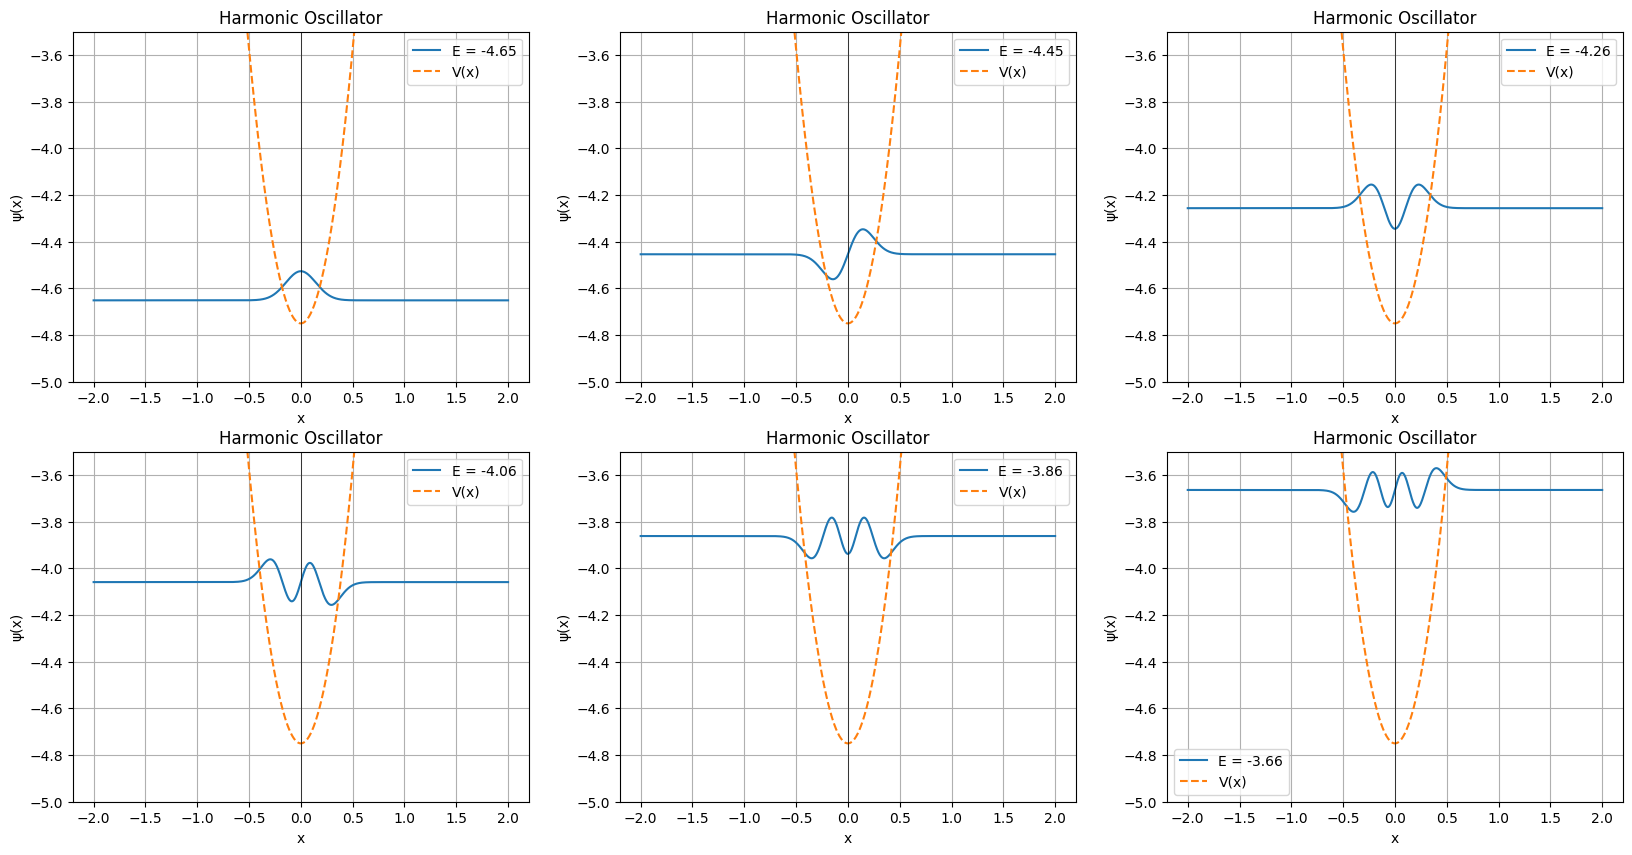

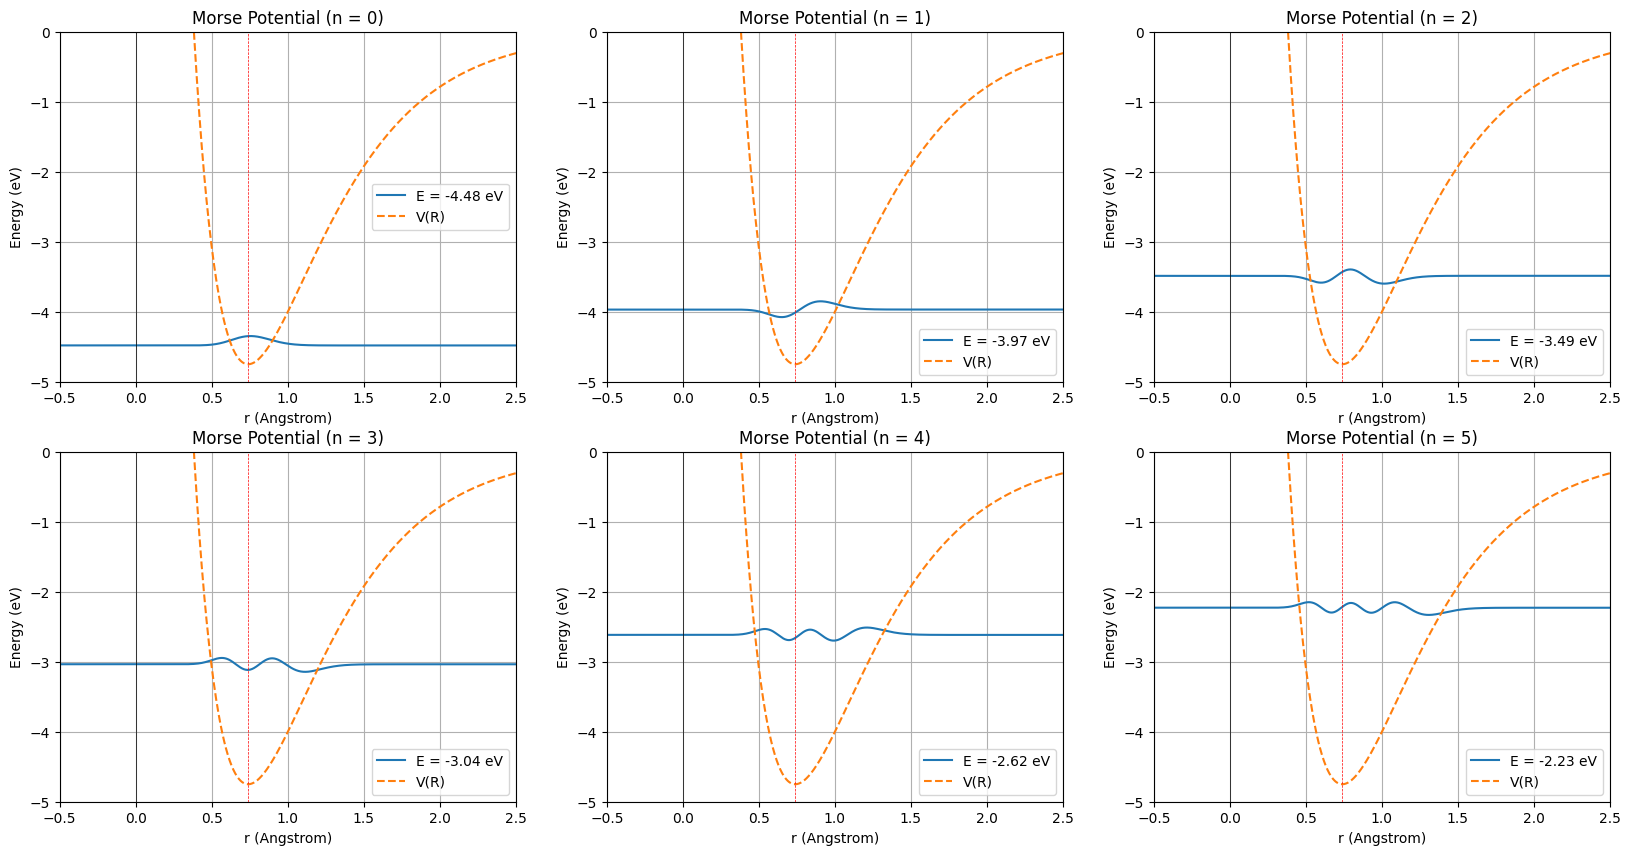

In [6]:
# Harmonic Potential

h = 0.004
hbar = 1973.269804
m = 940e6
w = 0.0001
x0 = -2
xl = 2
N = int((xl - x0) / h)
print(f'N = {N}')
x = np.linspace(x0, xl, N)
c = -hbar**2 / (2 * m * h**2)

def Vh(x):
    return 0.5 * m * w**2 * (x)**2 - 4.75

H = c*(np.diag(np.ones(N-1), k = -1)+ np.diag(-2*np.ones(N), k = 0) + np.diag(np.ones(N-1), k = 1)) + np.diag(Vh(x))

E, psi = np.linalg.eigh(H)
print(f'E = {E[:10]}')

fig, ax = plt.subplots(2,3, figsize=(20, 10))
ax = ax.flatten()
for i in range(6):
    ax[i].plot(x,psi[:, i] + E[i], label = 'E = %.2f' % E[i])
    ax[i].plot(x,Vh(x), label='V(x)', linestyle='--')
    ax[i].legend()
    ax[i].axhline(0, color='black', lw=0.5)
    ax[i].axvline(0, color='black', lw=0.5)
    ax[i].set_title('Harmonic Oscillator')
    ax[i].set_ylabel('ψ(x)')
    ax[i].set_xlabel('x')
    ax[i].set_ylim(-5,-3.5)
    ax[i].grid()


# Morse Potential

# Constants
m_H = 940e6  # mass of hydrogen atom in eV/c^2
a = 1.94  # in Angstrom^-1
re = 0.74  # in Angstrom
De = 4.75  # in eV
hbar = 1973.269804  # in eV*Angstrom/c (hbar c = 197.3 eV·Å)

mu = m_H / 2

def Vm(R):
    return De * (np.exp(-2 * a * R) - 2 * np.exp(-a * R))

R_min = -2.0  # in Angstrom (R = r - re)
R_max = 2.0   # in Angstrom
N = 1000  # number of grid points
R = np.linspace(R_min, R_max, N)
step_size = R[1] - R[0]  # spatial step size
c = -hbar**2 / (2 * mu * step_size**2)

H = np.zeros((N, N))

H = c * (np.diag(np.ones(N-1), k=-1) + np.diag(-2 * np.ones(N), k=0) + np.diag(np.ones(N-1), k=1)) + np.diag(Vm(R))

eigenvalues, eigenvectors = np.linalg.eigh(H)
print(eigenvalues[:5])

def normalize(wavefunction):
    return wavefunction

fig, ax = plt.subplots(2,3, figsize=(20, 10))
ax = ax.flatten()
for i in range(6):
    ax[i].plot(R + re, normalize(eigenvectors[:, i])+ eigenvalues[i], label=f'E = {eigenvalues[i]:.2f} eV')
    ax[i].plot(R + re, Vm(R), label='V(R)', linestyle='--')
    ax[i].set_xlabel('r (Angstrom)')
    ax[i].set_ylabel('Energy (eV)')
    ax[i].legend()
    ax[i].axhline(0, color='black', lw=0.5)
    ax[i].axvline(0, color='black', lw=0.5)
    ax[i].axvline(re, color='red', lw=0.5, linestyle='--')
    ax[i].set_title(f'Morse Potential (n = {i})')
    ax[i].set_ylim(-5, 0)
    ax[i].set_xlim(-0.5, 2.5)
    ax[i].grid()

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets


def plot(m,w,De,a):

    # Harmonic Potential
    h = 0.002
    hbar = 1973.269804
    x0 = -2
    xl = 2
    N = int((xl - x0) / h)
    
    print(f'N = {N}')
    x = np.linspace(x0, xl, N)
    c = -hbar**2 / (2 * m * h**2)

    def Vh(x):
        return 0.5 * m * w**2 * (x)**2 - 4.75

    H = c*(np.diag(np.ones(N-1), k = -1)+ np.diag(-2*np.ones(N), k = 0) + np.diag(np.ones(N-1), k = 1)) + np.diag(Vh(x))
    E_h, psi_h = np.linalg.eigh(H)

    # Morse Potential
    re = 0  # in Angstrom
    hbar = 1973.269804  # in eV*Angstrom/c (hbar c = 197.3 eV·Å)
    mu = m / 2

    def Vm(R):
        return De * (np.exp(-2 * a * R) - 2 * np.exp(-a * R))

    R_min = -2.0  # in Angstrom (R = r - re)
    R_max = 2.0   # in Angstrom
    N = 1000  # number of grid points
    R = np.linspace(R_min, R_max, N)
    step_size = R[1] - R[0]  # spatial step size
    c = -hbar**2 / (2 * mu * step_size**2)

    H = np.zeros((N, N))

    H = c * (np.diag(np.ones(N-1), k=-1) + np.diag(-2 * np.ones(N), k=0) + np.diag(np.ones(N-1), k=1)) + np.diag(Vm(R))

    E_m, psi_m = np.linalg.eigh(H)
    
    def normalize(wavefunction):
        return wavefunction
    print(f'E = {E_h[:50]}')
    print(f'E = {E_m[:50]}')
    for i in range(6):
       
        plt.plot(x,normalize(psi_h[:, i]) + E_h[i],color='red',alpha=0.5)
        plt.plot(x,Vh(x), label='Vh(x)', linestyle='--',color='yellow')
        plt.plot(R + re, normalize(psi_m[:, i])+ E_m[i], color='green')
        plt.plot(R + re, Vm(R), label='Vm(R)', linestyle='--',color='black')
        plt.xlabel('r (Angstrom)')
        plt.ylabel('Energy (eV)')
        # plt.legend()
        plt.axhline(0, color='black', lw=0.5)
        plt.axvline(0, color='black', lw=0.5)
        plt.axvline(re, color='red', lw=0.5, linestyle='--')
        plt.title(f'Morse and Harmonic (n = {i})')
        plt.ylim(-4.8, -2.5)
        plt.xlim(-0.75, 0.75)
        plt.grid()

widgets.interact(plot, m=widgets.FloatSlider(value=940e6, min=930e6, max=950e6, step=100, description='m (eV/c^2)', readout_format='.0f'),
                    w=widgets.FloatSlider(value=0.00019, min=0.00010, max=0.00030, step=0.00001, description='w (eV)', readout_format='.5f'),
                    De=widgets.FloatSlider(value=4.75, min=3, max=6, step=0.25, description='De (eV)', readout_format='.2f'),
                    a=widgets.FloatSlider(value=1.59, min=0.2, max=3, step=0.01, description='a (Angstrom^-1)'), readout_format='.2f')




interactive(children=(FloatSlider(value=940000000.0, description='m (eV/c^2)', max=950000000.0, min=930000000.…

<function __main__.plot(m, w, De, a)>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets


def plot(m,w,De,a):

    # Harmonic Potential
    h = 0.002
    hbar = 1973.269804
    x0 = -2
    xl = 2
    N = int((xl - x0) / h)
    print(f'N = {N}')
    x = np.linspace(x0, xl, N)
    c = -hbar**2 / (2 * m * h**2)

    def Vh(x):
        return 0.5 * m * w**2 * (x)**2 - 4.75

    H = c*(np.diag(np.ones(N-1), k = -1)+ np.diag(-2*np.ones(N), k = 0) + np.diag(np.ones(N-1), k = 1)) + np.diag(Vh(x))
    E_h, psi_h = np.linalg.eigh(H)

    # Morse Potential
    re = 0  # in Angstrom
    hbar = 1973.269804  # in eV*Angstrom/c (hbar c = 197.3 eV·Å)
    mu = m / 2

    def Vm(R):
        return De * (1 - np.exp(-a * (R - re)))**2 -4.75

    R_min = -2.0  # in Angstrom (R = r - re)
    R_max = 2.0   # in Angstrom
    N = 1000  # number of grid points
    R = np.linspace(R_min, R_max, N)
    step_size = R[1] - R[0]  # spatial step size
    c = -hbar**2 / (2 * mu * step_size**2)

    H = np.zeros((N, N))

    H = c * (np.diag(np.ones(N-1), k=-1) + np.diag(-2 * np.ones(N), k=0) + np.diag(np.ones(N-1), k=1)) + np.diag(Vm(R))

    E_m, psi_m = np.linalg.eigh(H)

    for i in range(10):
        plt.plot(x,psi_h[:, i] + E_h[i],color='red',alpha=0.5)
        plt.plot(x,Vh(x), label='Vh(x)', linestyle='--',color='yellow')
        plt.plot(R + re, psi_m[:, i]+ E_h[i], color='green')
        plt.plot(R + re, Vm(R), label='Vm(R)', linestyle='--',color='black')
        plt.xlabel('r (Angstrom)')
        plt.ylabel('Energy (eV)')
        # plt.legend()
        plt.axhline(0, color='black', lw=0.5)
        plt.axvline(0, color='black', lw=0.5)
        plt.axvline(re, color='red', lw=0.5, linestyle='--')
        plt.title(f'Morse and Harmonic (n = {i})')
        plt.ylim(-4.8, -2.5)
        plt.xlim(-0.75, 0.75)
        plt.grid()

widgets.interact(plot, m=widgets.FloatSlider(value=940e6, min=930e6, max=950e6, step=100, description='m (eV/c^2)', readout_format='.0f'),
                    w=widgets.FloatSlider(value=0.00019, min=0.00010, max=0.00030, step=0.00001, description='w (eV)', readout_format='.5f'),
                    De=widgets.FloatSlider(value=4.75, min=3, max=6, step=0.25, description='De (eV)', readout_format='.2f'),
                    a=widgets.FloatSlider(value=1.59, min=0.2, max=4, step=0.01, description='a (Angstrom^-1)'), readout_format='.2f')




interactive(children=(FloatSlider(value=940000000.0, description='m (eV/c^2)', max=950000000.0, min=930000000.…

<function __main__.plot(m, w, De, a)>

# Hydrogen Atom Wavefunction Plot

h = 0.00999
E = [-12.74151765  -3.28953396  -1.47784426  -0.79963219  -0.19319615
   0.6457617    1.71393569   2.99745129   4.48859818   6.18260596]


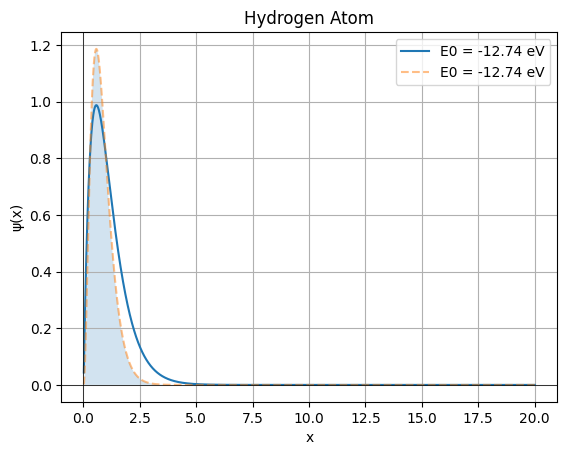

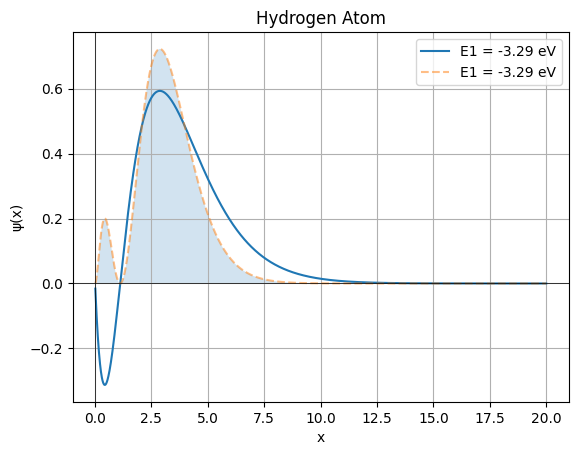

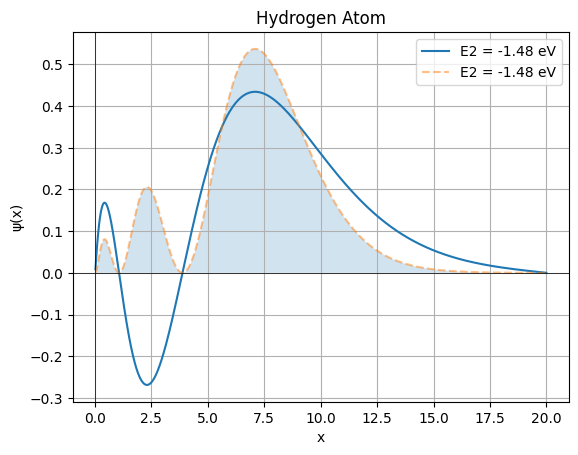

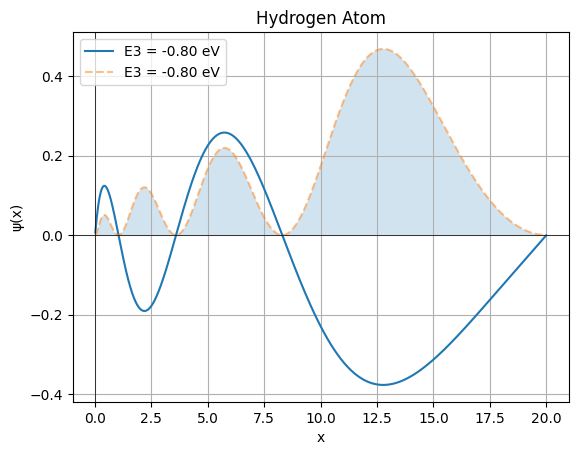

In [9]:
import numpy as np
import matplotlib.pyplot as plt
# Hydrogen atom

N = 2000
hbarc = 1973.269804 # in eV*Angstrom
m = 0.511e6 # in eV/c^2
e = 3.795 # in (eV*Angstrom)^(1/2)
w = 1
x0 = 0.02
xl = 20
h = (xl - x0) / N
print(f'h = {h}')
x = np.linspace(x0, xl, N)
c = -hbarc**2 / (2 * m * h**2)

def V(x):
    return -(e**2) / x

H = c * (np.diag(np.ones(N-1), k=-1) + np.diag(-2 * np.ones(N), k=0) + np.diag(np.ones(N-1), k=1)) + np.diag(V(x))

E, psi = np.linalg.eigh(H)
print(f'E = {E[:10]}')

def normalize(wavefunction):
    return wavefunction / np.sqrt(np.sum(wavefunction**2) * h)

for i in range(4):
    plt.plot(x, -normalize(psi[:, i]), label=f'E{i} = {E[i]:.2f} eV')
    # plot probability density
    plt.plot(x, normalize(psi[:, i]**2), label=f'E{i} = {E[i]:.2f} eV', linestyle='--', alpha=0.5)
    plt.fill_between(x, 0, normalize(psi[:, i]**2), alpha=0.2)
    plt.axhline(0, color='black', lw=0.5)
    plt.axvline(0, color='black', lw=0.5)
    plt.title('Hydrogen Atom')
    plt.ylabel('ψ(x)')
    plt.xlabel('x')
    plt.legend()
    plt.grid()
    plt.show()


h = 0.009994999999999999
E = [-13.59911756  -3.40000674  -1.51102759  -0.81766455  -0.21727805
   0.61345408   1.67396323   2.95009436   4.43399619   6.12082505]


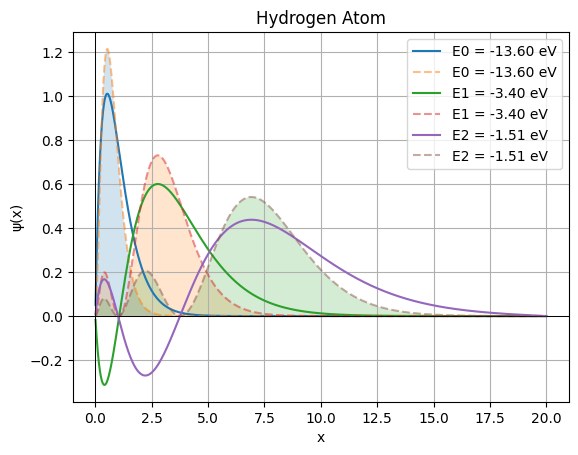

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Hydrogen atom

N = 2000
hbarc = 1973 # in eV*Angstrom
m = 0.511e6 # in eV/c^2
e = 3.795 # in (eV*Angstrom)^(1/2)
w = 1
x0 = 0.01
xl = 20
h = (xl - x0) / N
print(f'h = {h}')
x = np.linspace(x0, xl, N)
c = -hbarc**2 / (2 * m * h**2)

def V(x):
    return -(e**2) / x

H = c * (np.diag(np.ones(N-1), k=-1) + np.diag(-2 * np.ones(N), k=0) + np.diag(np.ones(N-1), k=1)) + np.diag(V(x))

E, psi = np.linalg.eigh(H)
print(f'E = {E[:10]}')

def normalize(wavefunction):
    return wavefunction / np.sqrt(np.sum(wavefunction**2) * h)

for i in range(3):
    plt.plot(x, -normalize(psi[:, i]), label=f'E{i} = {E[i]:.2f} eV')
    # plot probability density
    plt.plot(x, normalize(psi[:, i]**2), label=f'E{i} = {E[i]:.2f} eV', linestyle='--', alpha=0.5)
    plt.fill_between(x, 0, normalize(psi[:, i]**2), alpha=0.2)
    plt.axhline(0, color='black', lw=0.5)
    plt.axvline(0, color='black', lw=0.5)
    plt.title('Hydrogen Atom')
    plt.ylabel('ψ(x)')
    plt.xlabel('x')
    plt.legend()
    plt.grid()


# Screened Potential

h = 0.009994999999999999
E = [-9.37291114 -0.49907231  0.13971981  0.57472913  1.2511183   2.14555333
  3.24891829  4.55613559  6.0638142   7.76949562]


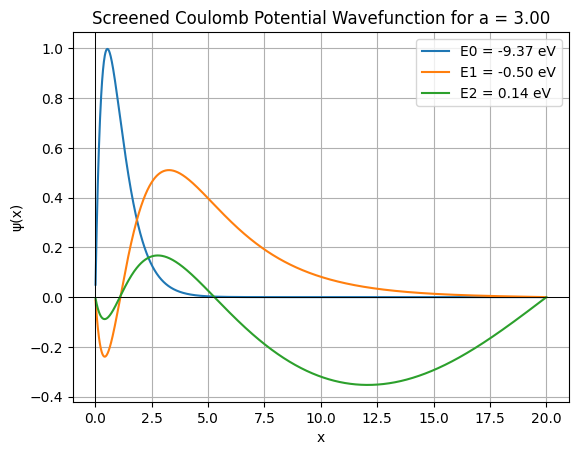

E = [-10.93330667  -1.2732165   -0.042692     0.36520685   1.00853478
   1.88139221   2.96942942   4.26503548   5.76352835   7.46173083]


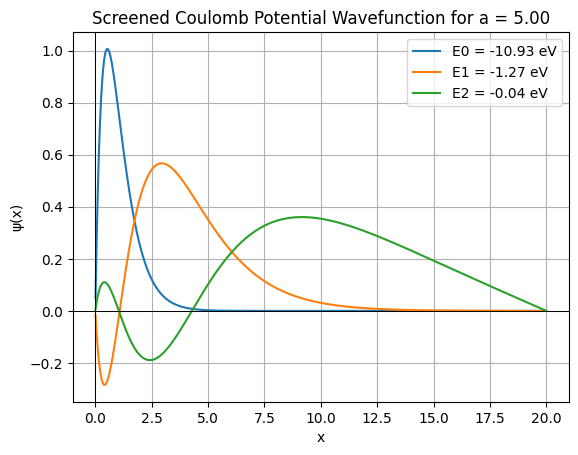

E = [-11.65305949  -1.7458038   -0.24334559   0.21495123   0.83695039
   1.69739706   2.77700664   4.06644793   5.56020646   7.2546474 ]


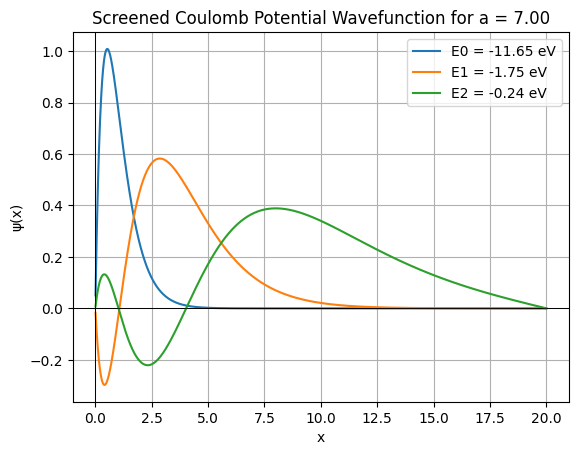

In [13]:
import numpy as np
import matplotlib.pyplot as plt
# Screened Coulomb Potential

N = 2000
hbarc = 1973 # in eV*Angstrom
m = 0.511e6 # in eV/c^2
e = 3.795 # in (eV*Angstrom)^(1/2)
w = 1
x0 = 0.01
xl = 20
h = (xl - x0) / N
print(f'h = {h}')
x = np.linspace(x0, xl, N)
c = -hbarc**2 / (2 * m * h**2)
a = [3,5,7]   # in Angstrom

def plot(a):
    def V(x):
        return -((e**2) / x) * np.exp(-x/a)

    H = c * (np.diag(np.ones(N-1), k=-1) + np.diag(-2 * np.ones(N), k=0) + np.diag(np.ones(N-1), k=1)) + np.diag(V(x))

    E, psi = np.linalg.eigh(H)
    print(f'E = {E[:10]}')

    def normalize(wavefunction):
        return wavefunction / np.sqrt(np.sum(wavefunction**2) * h)

    for i in range(3):
        plt.plot(x, -normalize(psi[:, i]), label=f'E{i} = {E[i]:.2f} eV')
        plt.axhline(0, color='black', lw=0.5)
        plt.axvline(0, color='black', lw=0.5)
        plt.title('Screened Coulomb Potential Wavefunction for a = %.2f' % a)
        plt.ylabel('ψ(x)')
        plt.xlabel('x')
        plt.legend()
        plt.grid()

for a in a:
    plot(a)
    plt.show()


# Spherical Harmonics

In [ ]:
import numpy as np
from scipy.special import sph_harm
import ipywidgets as widgets


import matplotlib.pyplot as plt

# Define the spherical harmonics function
def plot_spherical_harmonics(l, m):
    phi = np.linspace(0, 2 * np.pi, 100)
    theta = np.linspace(0, np.pi, 100)
    phi, theta = np.meshgrid(phi, theta)

    Y_lm = sph_harm(m, l, phi, theta)

    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)
    r = np.abs(Y_lm)

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(r * x, r * y, r * z, rstride=1, cstride=1, color='c', alpha=0.6, edgecolor='k')
    ax.set_title(f'Spherical Harmonics: l={l}, m={m}')
    plt.show()



widgets.interact(plot_spherical_harmonics, l=widgets.IntSlider(value=1, min=0, max=5, step=1, description='l'),
                    m=widgets.IntSlider(value=0, min=-5, max=5, step=1, description='m'))


interactive(children=(IntSlider(value=1, description='l', max=5), IntSlider(value=0, description='m', max=5, m…

<function __main__.plot_spherical_harmonics(l, m)>

In [3]:
import numpy as np
from scipy.special import sph_harm
import ipywidgets as widgets
import scipy.special as sp
import math

import matplotlib.pyplot as plt

# Define the spherical harmonics function
def plot_spherical_harmonics(l, m):
    phi = np.linspace(0, 2 * np.pi, 100)
    theta = np.linspace(0, np.pi, 100)
    phi, theta = np.meshgrid(phi, theta)

    Y_lm = (-1)**m * np.sqrt((2 * l + 1) / 4 / np.pi * math.factorial(l - m) / math.factorial(l + m)) * np.exp(1j * m * phi) * sp.lpmv(m, l, np.cos(theta))


    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)
    r = np.abs(Y_lm)

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(r * x, r * y, r * z, rstride=1, cstride=1, color='c', alpha=0.6, edgecolor='k')
    ax.set_title(f'Spherical Harmonics: l={l}, m={m}')
    plt.show()



widgets.interact(plot_spherical_harmonics, l=widgets.IntSlider(value=1, min=0, max=5, step=1, description='l'),
                    m=widgets.IntSlider(value=0, min=-5, max=5, step=1, description='m'))


interactive(children=(IntSlider(value=1, description='l', max=5), IntSlider(value=0, description='m', max=5, m…

<function __main__.plot_spherical_harmonics(l, m)>